# Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Abre el archivo de datos y estudia la información general 

In [1]:
#IMPORTANDO LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas). Listo

Convierte los datos en los tipos necesarios. Listo

Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Cambiamos el año de lanzamiento a tipo int ya que al momento de realizar los analisis tener los años en tipo flotante nos puede arrojar valores erroneos.

Si es necesario, elige la manera de tratar los valores ausentes:

Por el momento dejamos valores ausentes para algunas columnas ya que nos pueden arrojar muchas variaciones pero más adelante quitaremos dichos valores en el proyecto

Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

Como ya mencioné, por el momento decidimos dejarlos para no tener variaciones y sesgos.

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Pueden haber valores ausentes ya que desde un principio no se registraban de todos los datos.

Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Cambiar el tipo de dato a flotante.

Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [5]:
#Reemplazando los nombres de las columnas en minusculas

df.columns = df.columns.str.lower()

#Verificando cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#Revisando valores ausentes
df.isna().sum()


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#Valores nulos en name y genre
#Lo mejor es eliminarlos

df = df.dropna(subset=['name', 'genre'])

df.isna().sum()

#Valores nulos eliminados para name y genre.

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [8]:
#Cambiar el año de lanzamiento a tipo int

#Para esto primero tenemos que eliminar los valores nulos de year of release
df = df.dropna(subset=['year_of_release'])
df.isna().sum()






name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [9]:
#Cambiar tipo de valores de year of release
df['year_of_release'] = df['year_of_release'].astype(int)

#verificar que el tipo de dato se haya cambiado correctamente
print(df.dtypes)

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [10]:
#Explorando la columna user score
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
#Cambiando el tipo de dato de user score de object a float
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)
df.user_score.unique()



array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
#Calcular la ventas totales

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
#Creando nueva columna para el calculo de ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Paso 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

#A partir del año 2001 podemos decir que nuestros datos son significativos para cada periodo debido a la cantidad de datos de ese año en adelante.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

En promedio 10 años

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [15]:
#juegos por año

count_games = df.groupby('year_of_release')['name'].count().reset_index()
count_games

#A partir del año 2001 podemos decir que nuestros datos son significativos para cada periodo debido a la cantidad de datos de ese año en adelante.

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [16]:
#Ventas por plataforma

sales_by_consoles = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc ='sum').sort_values(by= 'total_sales', ascending= False)

sales_by_consoles

#Primeras 10 consolas que mas venden segun el df
sales_by_consoles.head(10).index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [17]:
games_top_platform =df[df.platform.isin(sales_by_consoles.head(10).index)]
games_top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


g:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year_of_release', ylabel='total_sales'>

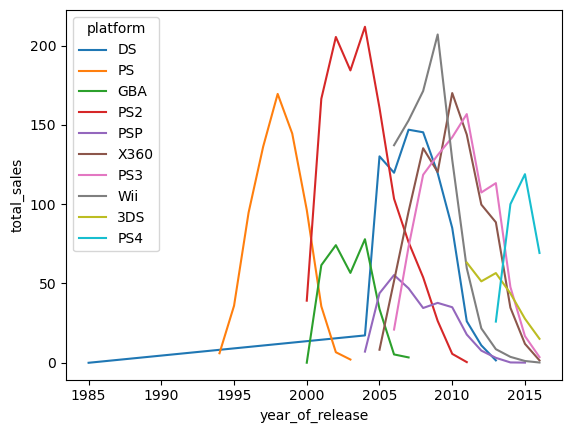

In [18]:
#Construyendo la distribucion

chart_top_platforms = games_top_platform.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sns.lineplot(data=chart_top_platforms, x='year_of_release', y='total_sales', hue = 'platform')

In [19]:
#Ciclo de vida de las consolas

life_cycle_platform = chart_top_platforms.groupby('platform').agg(
    max_year = ('year_of_release', 'max'),
    min_year = ('year_of_release', 'min')
).reset_index()

life_cycle_platform['lifetime'] = life_cycle_platform['max_year'] - life_cycle_platform['min_year']
life_cycle_platform


,platform,max_year,min_year,lifetime
0,3DS,2016,2011,5
1,DS,2013,1985,28
2,GBA,2007,2000,7
3,PS,2003,1994,9
4,PS2,2011,2000,11
5,PS3,2016,2006,10
6,PS4,2016,2013,3
7,PSP,2015,2004,11
8,Wii,2016,2006,10
9,X360,2016,2005,11


In [20]:
life_cycle_platform.lifetime.mean()

10.5

In [21]:
# Filtrar datos entre 2001 y 2016
filtered_data = games_top_platform[(games_top_platform['year_of_release'] >= 2001) & (games_top_platform['year_of_release'] <= 2016)]
# Calcular ventas totales por plataforma
platform_sales = filtered_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(platform_sales)



platform
PS2     1194.39
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.81
PSP      289.53
3DS      257.81
PS        44.33
Name: total_sales, dtype: float64


platform           3DS      DS    GBA     PS     PS2     PS3     PS4    PSP  \
year_of_release                                                               
2001              0.00    0.00  61.53  35.59  166.43    0.00    0.00   0.00   
2002              0.00    0.00  74.16   6.67  205.38    0.00    0.00   0.00   
2003              0.00    0.00  56.67   2.07  184.31    0.00    0.00   0.00   
2004              0.00   17.27  77.91   0.00  211.81    0.00    0.00   7.06   
2005              0.00  130.14  33.86   0.00  160.66    0.00    0.00  43.84   
2006              0.00  119.81   5.28   0.00  103.42   20.96    0.00  55.32   
2007              0.00  146.94   3.40   0.00   75.99   73.19    0.00  46.93   
2008              0.00  145.31   0.00   0.00   53.90  118.52    0.00  34.55   
2009              0.00  119.54   0.00   0.00   26.40  130.93    0.00  37.78   
2010              0.00   85.02   0.00   0.00    5.64  142.17    0.00  35.04   
2011             63.20   26.18   0.00   0.00    0.45

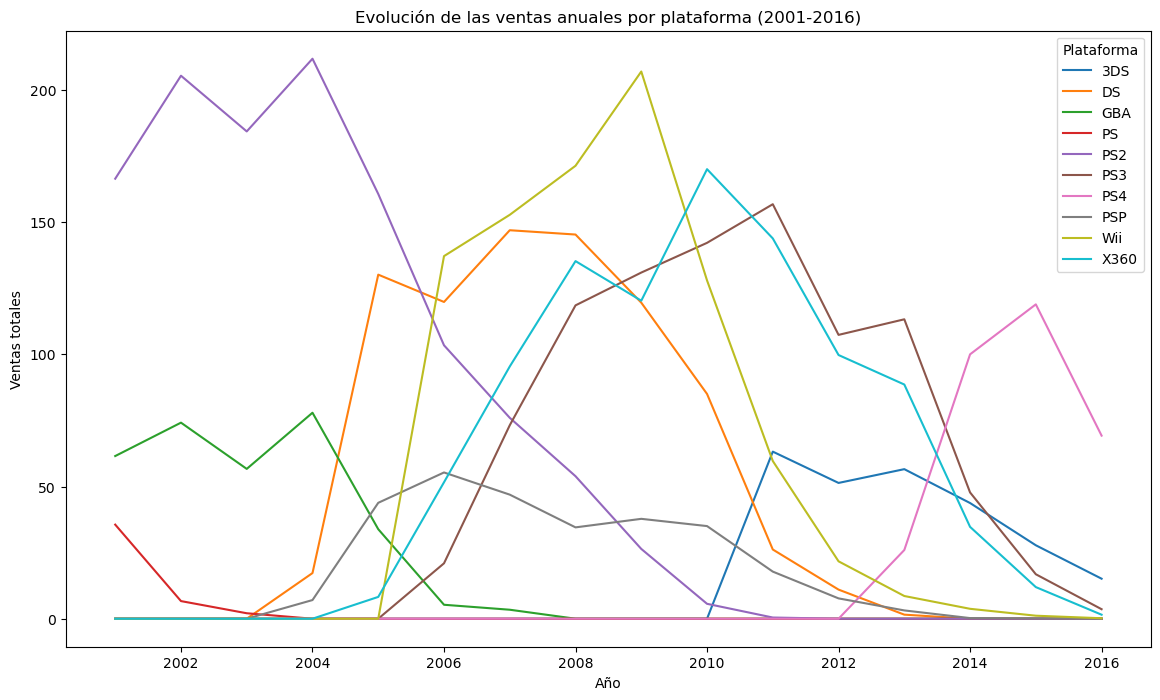

In [22]:
# Calcular ventas anuales por plataforma
annual_sales = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Mostrar las ventas anuales
print(annual_sales)

# Graficar la evolución de las ventas anuales por plataforma
annual_sales.plot(kind='line', figsize=(14, 8))
plt.title('Evolución de las ventas anuales por plataforma (2001-2016)')
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.legend(title='Plataforma')
plt.show()


In [23]:
# Identificar plataformas con mayores ventas y tendencias positivas
# Primero, calculamos el crecimiento de ventas desde el inicio hasta el final del período
growth = annual_sales.iloc[-1] - annual_sales.iloc[0]

# Mostrar crecimiento de ventas por plataforma
print(growth)

# Seleccionar plataformas con crecimiento positivo y mayores ventas
potentially_profitable_platforms = growth[growth > 3].sort_values(ascending=False).index

print("Plataformas potencialmente rentables:", potentially_profitable_platforms)


platform
3DS      15.14
DS        0.00
GBA     -61.53
PS      -35.59
PS2    -166.43
PS3       3.60
PS4      69.25
PSP       0.00
Wii       0.18
X360      1.52
dtype: float64
Plataformas potencialmente rentables: Index(['PS4', '3DS', 'PS3'], dtype='object', name='platform')


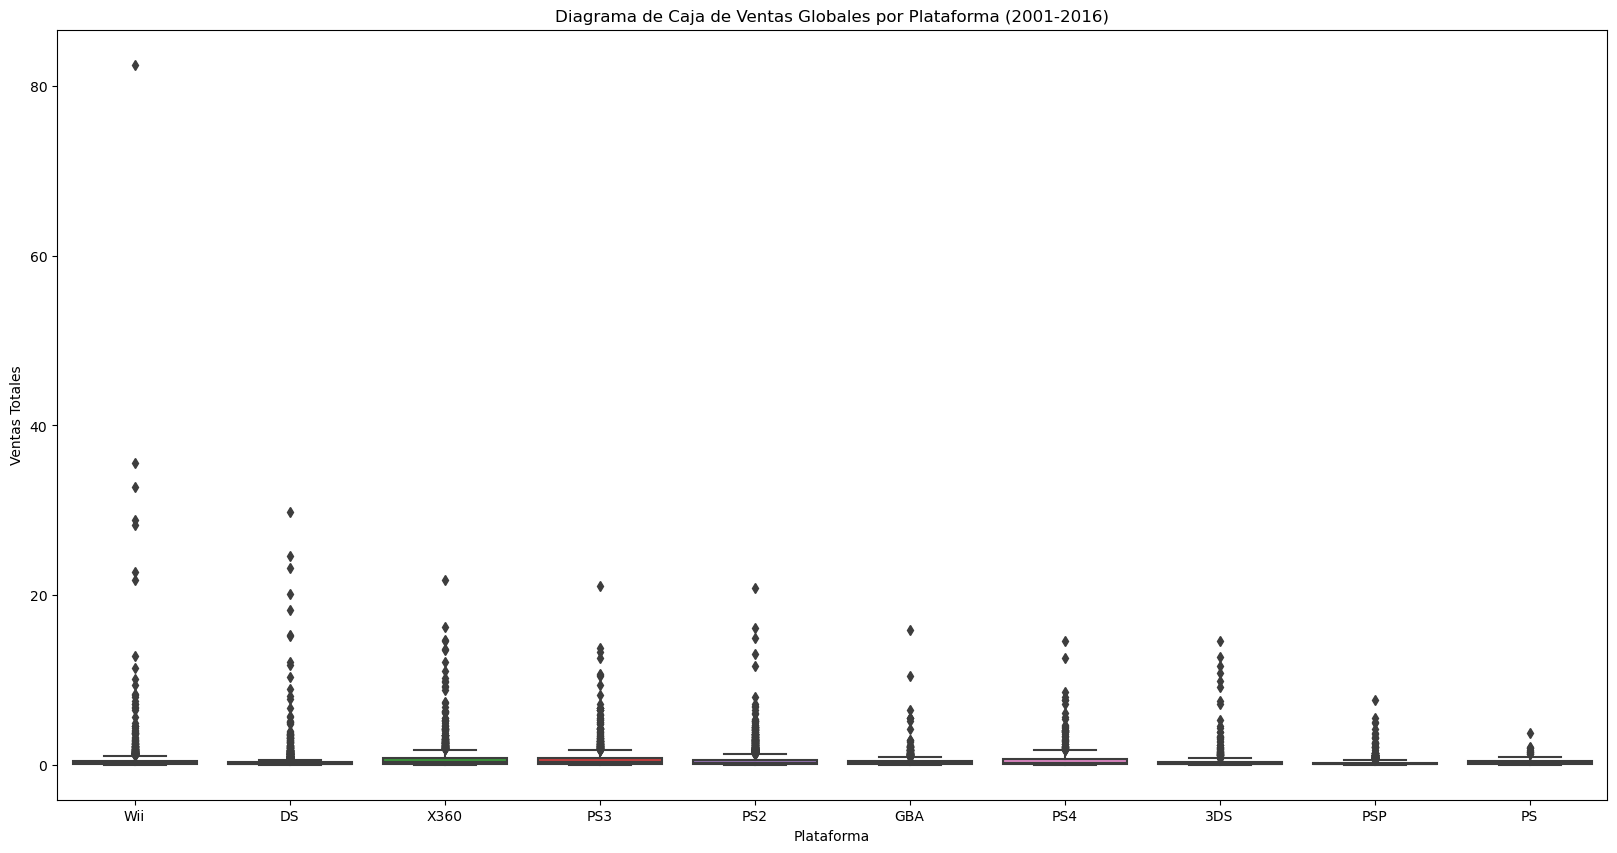

In [24]:
# Crear el diagrama de caja con Seaborn
plt.figure(figsize=(20, 10))  # Aumentar el tamaño del gráfico
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2001-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.show()


In [25]:
# Calcular las ventas promedio por plataforma
average_sales = filtered_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

print("Ventas promedio por plataforma:")
print(average_sales)


Ventas promedio por plataforma:
platform
PS4     0.801378
X360    0.780227
PS3     0.713124
Wii     0.692986
PS2     0.584054
3DS     0.503535
PS      0.388860
GBA     0.386185
DS      0.378660
PSP     0.242691
Name: total_sales, dtype: float64


Las ventas promedio varían significativamente entre las plataformas listadas. Por ejemplo, PS4 tiene el promedio más alto (0.801378), mientras que PSP tiene el promedio más bajo (0.242691).

PS4, X360, y PS3 están en la parte superior con ventas promedio superiores a 0.7, indicando que estos sistemas han tenido un buen desempeño en términos de ventas globales promedio por juego.

Por otro lado, plataformas como PSP, DS, y GBA tienen promedios bastante bajos, lo que sugiere que los juegos en estas plataformas tienden a vender menos en comparación con las más populares.

In [26]:
# Filtrar datos para la plataforma PS2 y seleccionar columnas relevantes
ps2_data = filtered_data[filtered_data['platform'] == 'PS2'][['name', 'critic_score', 'user_score', 'total_sales', 'year_of_release']]

ps2_data.head(10)

,name,critic_score,user_score,total_sales,year_of_release
17,Grand Theft Auto: San Andreas,95.0,9.0,20.81,2004
24,Grand Theft Auto: Vice City,95.0,8.7,16.15,2002
28,Gran Turismo 3: A-Spec,95.0,8.4,14.97,2001
38,Grand Theft Auto III,97.0,8.5,13.10,2001
48,Gran Turismo 4,89.0,8.5,11.65,2004
84,Final Fantasy X,92.0,8.7,8.04,2001
102,Need for Speed Underground,85.0,8.6,7.20,2003
113,Need for Speed Underground 2,82.0,8.6,6.90,2004
114,Medal of Honor: Frontline,88.0,8.5,6.84,2002
132,Kingdom Hearts,85.0,8.8,6.40,2002


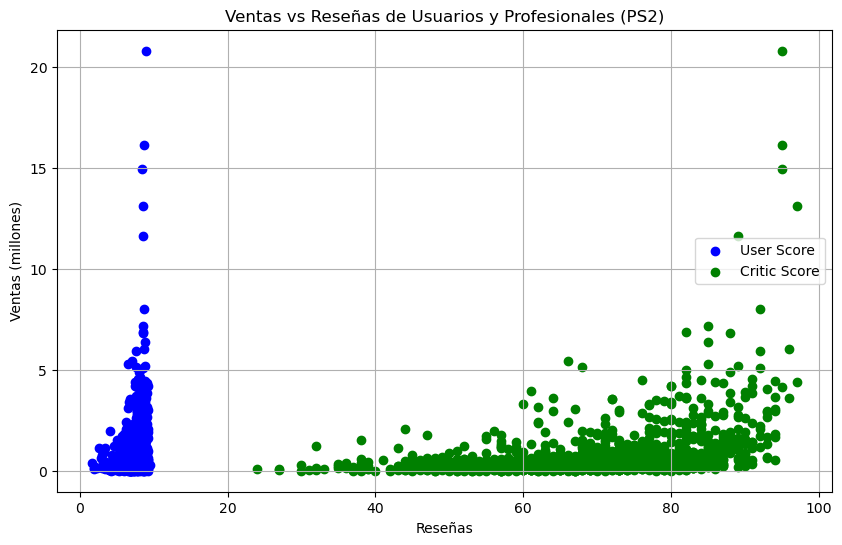

In [27]:
# Extraer datos relevantes para PS2
ps2_user_scores = ps2_data['user_score']
ps2_critic_scores = ps2_data['critic_score']
ps2_sales = ps2_data['total_sales']

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(ps2_user_scores, ps2_sales, color='blue', label='User Score')
plt.scatter(ps2_critic_scores, ps2_sales, color='green', label='Critic Score')
plt.title('Ventas vs Reseñas de Usuarios y Profesionales (PS2)')
plt.xlabel('Reseñas')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Verificar valores nulos en ps2_data
print(ps2_data.isnull().sum())

# Eliminar filas con valores nulos
ps2_data.dropna(inplace=True)



name                 0
critic_score       826
user_score         865
total_sales          0
year_of_release      0
dtype: int64


In [29]:
# Extraer datos limpios para PS2
ps2_user_scores_clean = ps2_data['user_score']
ps2_critic_scores_clean = ps2_data['critic_score']
ps2_sales_clean = ps2_data['total_sales']

# Calcular correlación nuevamente
correlation_user_sales = np.corrcoef(ps2_user_scores_clean, ps2_sales_clean)[0, 1]
correlation_critic_sales = np.corrcoef(ps2_critic_scores_clean, ps2_sales_clean)[0, 1]

print(f"Correlación entre User Score y Ventas de PS2: {correlation_user_sales}")
print(f"Correlación entre Critic Score y Ventas de PS2: {correlation_critic_sales}")


Correlación entre User Score y Ventas de PS2: 0.16967010794637444
Correlación entre Critic Score y Ventas de PS2: 0.3867041285218064


1.Correlación entre User Score y Ventas de PS2: 0.1696

La correlación positiva de 0.1717 sugiere que hay una relación débil positiva entre las reseñas de usuarios y las ventas de juegos en la plataforma PS2. Esto indica que a medida que aumentan las reseñas de los usuarios, las ventas tienden a aumentar ligeramente, pero la relación no es muy fuerte.

2.Correlación entre Critic Score y Ventas de PS2: 0.3867

La correlación positiva de 0.3864 indica que hay una relación moderadamente positiva entre las reseñas de los críticos y las ventas de juegos en la plataforma PS2. Esto sugiere que las reseñas de los críticos tienen una influencia más significativa en las ventas en comparación con las reseñas de los usuarios.

Desde mi punto de vista como usuario de videojuegos puedo decir que también la categoría de los videojuegos o los titulos influye en las ventas totales independientemente de la critica profesional y de la del jugador. Como podemos comparar el final fantasy vs el gta san andreas en mi tabla de arriba.

In [30]:
filtered_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


In [31]:
# Filtrar los datos para el juego específico Grand Theft Auto: San Andreas en diferentes plataformas
gta_sa_ps2 = filtered_data[(filtered_data['name'] == 'Grand Theft Auto: San Andreas') & (filtered_data['platform'] == 'PS2')]
gta_sa_xbox = filtered_data[(filtered_data['name'] == 'Grand Theft Auto: San Andreas') & (filtered_data['platform'] == 'X360')]

# Mostrar las ventas globales por plataforma
print("Ventas de Grand Theft Auto: San Andreas en diferentes plataformas:")
print(f"PS2: {gta_sa_ps2['total_sales'].values[0]} millones de unidades")
print(f"Xbox: {gta_sa_xbox['total_sales'].values[0]} millones de unidades")



Ventas de Grand Theft Auto: San Andreas en diferentes plataformas:
PS2: 20.810000000000002 millones de unidades
Xbox: 0.11 millones de unidades


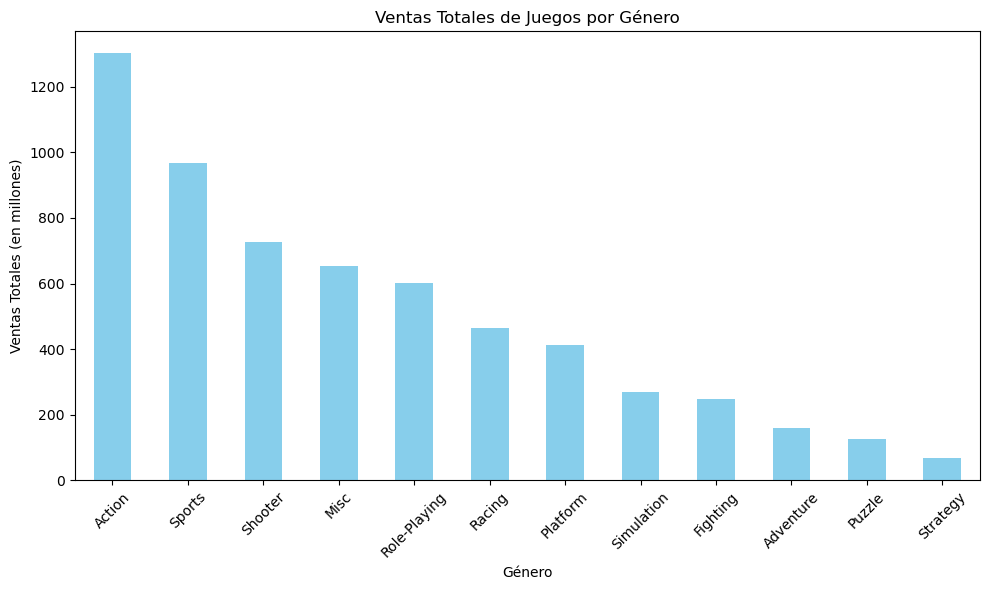

In [32]:
import matplotlib.pyplot as plt

# Agrupar y sumar las ventas totales por género
genre_sales = filtered_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plotear la distribución de ventas por género
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Los cinco géneros principales. Explica la diferencia.

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


In [33]:
market_sales = games_top_platform.groupby('platform').agg({
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'eu_sales': 'sum'
}).reset_index()


market_sales

,platform,na_sales,jp_sales,eu_sales
0,3DS,82.65,100.62,61.27
1,DS,380.31,175.02,188.41
2,GBA,184.12,46.56,74.59
3,PS,334.72,139.78,212.39
4,PS2,572.92,137.54,332.63
5,PS3,390.13,79.41,327.21
6,PS4,108.74,15.96,141.09
7,PSP,107.27,75.88,65.62
8,Wii,486.87,68.28,258.32
9,X360,595.74,12.30,268.32


In [34]:
market_sales = pd.melt(market_sales, id_vars= ['platform'],
        value_vars=['na_sales', 'jp_sales','eu_sales'],
        var_name='market',
        value_name='sales')
market_sales

,platform,market,sales
0,3DS,na_sales,82.65
1,DS,na_sales,380.31
2,GBA,na_sales,184.12
3,PS,na_sales,334.72
4,PS2,na_sales,572.92
5,PS3,na_sales,390.13
6,PS4,na_sales,108.74
7,PSP,na_sales,107.27
8,Wii,na_sales,486.87
9,X360,na_sales,595.74


<Axes: xlabel='market', ylabel='sales'>

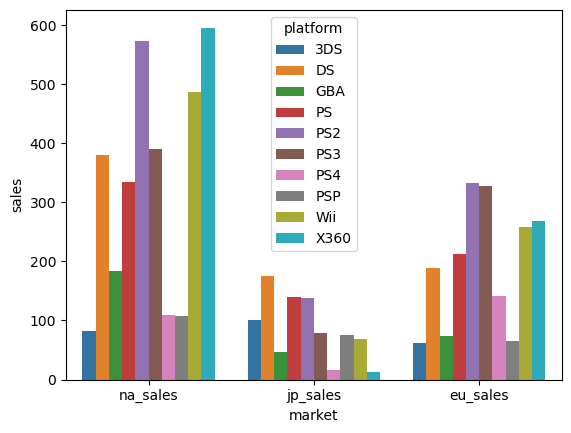

In [35]:
sns.barplot(market_sales, x = 'market', y ='sales', hue = 'platform')

Plataformas principales NA:

1.XBOX 360

2.PS2

3.Wii

4.PS3

5.DS

Plataformas principales JP:

1.DS

2.PS

3.PS2

4.3DS

5.PS3


Plataformas principales EU:

1.PS2

2.PS3

3.XBOX360

4.Wii

5.PS

Los japoneses prefieren consolas locales como la familia de playstation y nintendo.

In [36]:
genre_sales = games_top_platform.groupby('genre').agg({
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'eu_sales': 'sum'
}).reset_index()

genre_sales

,genre,na_sales,jp_sales,eu_sales
0,Action,689.29,129.24,434.41
1,Adventure,79.59,35.43,47.36
2,Fighting,160.71,50.49,81.92
3,Misc,349.59,82.62,192.70
4,Platform,244.52,52.39,139.44
5,Puzzle,63.66,26.36,39.33
6,Racing,269.56,34.61,196.74
7,Role-Playing,252.33,250.62,129.58
8,Shooter,403.36,22.81,246.06
9,Simulation,141.47,50.88,79.39


In [37]:
genre_sales = pd.melt(genre_sales, id_vars= ['genre'],
        value_vars=['na_sales', 'jp_sales','eu_sales'],
        var_name='region',
        value_name='sales')

genre_sales

,genre,region,sales
0,Action,na_sales,689.29
1,Adventure,na_sales,79.59
2,Fighting,na_sales,160.71
3,Misc,na_sales,349.59
4,Platform,na_sales,244.52
5,Puzzle,na_sales,63.66
6,Racing,na_sales,269.56
7,Role-Playing,na_sales,252.33
8,Shooter,na_sales,403.36
9,Simulation,na_sales,141.47


<Axes: xlabel='sales', ylabel='genre'>

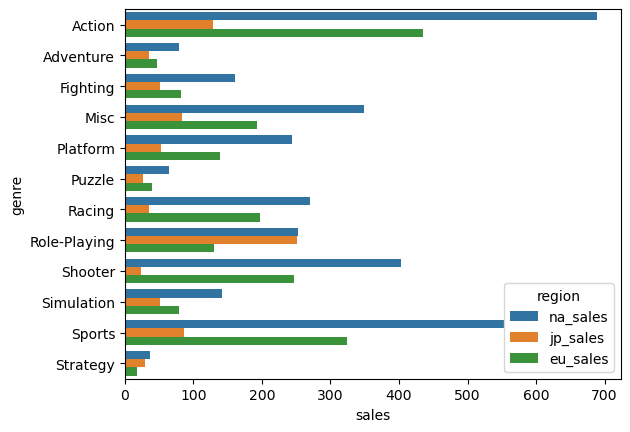

In [38]:
sns.barplot(genre_sales, x = 'sales', y ='genre', hue = 'region')

Generos principales NA:

1.Action

2.Sports

3.Shooter

4.Misc

5.Racing

Plataformas principales JP:

1.Role PLaying

2.Action

3.Sports

4.Misc

5.Platform


Plataformas principales EU:

1.Action

2.Sports

3.Shooter

4.Racing

5.Misc

Lo que se puede observar e inferir es que al parecer el mercado norteamericano y europeo tiene las mismas preferencias en los generos mientras que el mercado japones se decanta principalmente por los juegos de role play, esto puede ser debido a que en su mercado puede haber un catalogo más extenso para este genero dentro de todas sus concolas.

In [39]:
esrb_sales = games_top_platform.groupby('rating').agg({
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'eu_sales': 'sum'
}).reset_index()

esrb_sales

,rating,na_sales,jp_sales,eu_sales
0,E,1114.22,178.92,632.87
1,E10+,309.69,36.82,159.74
2,EC,1.35,0.00,0.09
3,K-A,0.26,1.46,0.16
4,M,613.09,60.13,393.66
5,T,598.84,137.21,330.47


In [40]:
esrb_sales = pd.melt(esrb_sales, id_vars= ['rating'],
        value_vars=['na_sales', 'jp_sales','eu_sales'],
        var_name='region',
        value_name='sales')

esrb_sales

,rating,region,sales
0,E,na_sales,1114.22
1,E10+,na_sales,309.69
2,EC,na_sales,1.35
3,K-A,na_sales,0.26
4,M,na_sales,613.09
5,T,na_sales,598.84
6,E,jp_sales,178.92
7,E10+,jp_sales,36.82
8,EC,jp_sales,0.00
9,K-A,jp_sales,1.46


<Axes: xlabel='rating', ylabel='sales'>

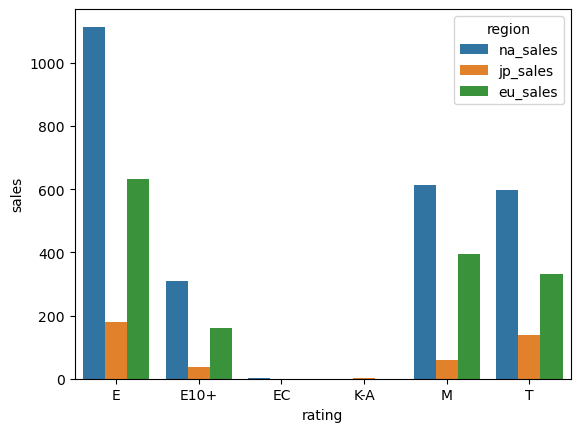

In [41]:
sns.barplot(esrb_sales, x = 'rating', y ='sales', hue = 'region')

Podemos observar que las clasificaciones si afectan a las regiones individuales, por ejemplo hhay una mayor disminución de ventas con clasificación M para japón a comparación del mercado norteamericano y europeo.

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

Formular la hipotesis nula y alternativa

h0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y Pc son las mismas
h1: Las calificaciones son distintas.

Obtener la información que necesitemos

Las series no tienen que teneer nans y los datos para ambos grupos esten en dos series/variables distintas

In [42]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [43]:
score_xone = df[df['platform'] == 'Xone']['user_score'].dropna()
score_pc = df[df['platform'] == 'PC']['user_score'].dropna()

In [44]:
#Definiendo test y significancia

#nivel standar alfa de 0.05 
#Comparar dos categorias Xbox one y PC con respecto a una variable numerica 'user score', lo mas adecuado es usar el t-test.

alpha = 0.05

_, p_value = ttest_ind(
    score_xone,
    score_pc,
)

if p_value < alpha:
    print('Rechazamos nuestra hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

No rechazamos la hipotesis nula
